In [1]:
import pandas as pd
import numpy as np

#### Retriving Updated DF

In [2]:
tt_df=pd.read_csv("./toronto_updated.csv")
tt_df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.758800,-79.320197
1,M4A,North York,Victoria Village,43.732658,-79.311189
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.640080,-79.380150
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.722778,-79.450933
4,M7A,Queen's Park,Queen's Park,43.659980,-79.390369


# Mapping Cordinates:


#### Setting Up Folium

In [3]:
import folium
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="coursera_capstone_05", timeout=15)


#### Making Main Map

In [6]:
location=geolocator.geocode("Toronto")
latitude=location.latitude
longitude=location.longitude
latitude=location.latitude
longitude=location.longitude
print("Toronto has Location:",latitude,"Longitude", longitude)


Toronto has Location: 43.653963 Longitude -79.387207


In [7]:
print("Generating Map:")
tor_map=folium.Map(location=[latitude, longitude], zoom_start=10)
tor_map

Generating Map:


#### No of Boroughs ?

In [9]:
tt_df.groupby("Borough").count()

,PostalCode,Neighbourhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,18,18,18,18
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Queen's Park,1,1,1,1
Scarborough,17,17,17,17


#### Making color Paletes for diffrent boroughs 

In [10]:
import seaborn as sns

boroughs=tt_df["Borough"].unique()
palettes=sns.color_palette(None,len(boroughs)).as_hex()
borough_colour_dict=dict(zip(boroughs, palettes))

#### Making Boroughs Cluster map

In [11]:
for i in tt_df.index:
    borough=tt_df.iloc[i]["Borough"]
    neighbourhood=tt_df.iloc[i]["Neighbourhood"]
    
    label=neighbourhood+","+borough
    label=folium.Popup(label, parse_html=True)
    
        
    lat=tt_df.iloc[i]["Latitude"]
    long=tt_df.iloc[i]["Longitude"]
    color=borough_colour_dict[borough]
    
    folium.CircleMarker(
                        [lat, long],
                        radius=5,
                        popup=label,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.5,
                        parse_html=False
                        ).add_to(tor_map)
tor_map

# Foursquare Data Retrival

#### Setting up Foursqare API

In [12]:
import requests

CLIENT_ID = '0AN3UQMPGX1WAWOL30A4V32URKRUW40GEGWPAY4AOG5EXBAU'
CLIENT_SECRET = 'XQVSEVB5BI35THZYUL1G1ZEC3YLNPR1NDMP3PM1XQPDINXTF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
radius=500

#### Exploring random Neibhouhood

In [13]:
latitude=tt_df["Latitude"][2]
longitude=tt_df["Longitude"][3]

print("For Latitude:", latitude, "Longitude:", longitude)
url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,radius)
results = requests.get(url).json()
results

For Latitude: 43.64008010000001 Longitude: -79.45093320000002


{'meta': {'code': 200, 'requestId': '5db18a7d53159300398a4d51'},
 'response': {'venues': [{'id': '51596cade4b04e4af6e94569',
    'name': 'Fracture Clinic St. Joseph Health Centre',
    'location': {'address': '30 The QUEENSWAY',
     'lat': 43.640188,
     'lng': -79.450825,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.640188,
       'lng': -79.450825}],
     'distance': 14,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['30 The QUEENSWAY', 'Toronto ON', 'Canada']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1571916413',
    'hasPerk': False},
   {'id': '4ae5f615f964a5208ba321e3',
    'name': "St. Joseph's Health Centre",
    'location': {'

#### Retriving depper info

In [14]:
venues=results["response"]["venues"]
venues

[{'id': '51596cade4b04e4af6e94569',
  'name': 'Fracture Clinic St. Joseph Health Centre',
  'location': {'address': '30 The QUEENSWAY',
   'lat': 43.640188,
   'lng': -79.450825,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.640188,
     'lng': -79.450825}],
   'distance': 14,
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['30 The QUEENSWAY', 'Toronto ON', 'Canada']},
  'categories': [{'id': '4bf58dd8d48988d104941735',
    'name': 'Medical Center',
    'pluralName': 'Medical Centers',
    'shortName': 'Medical',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1571916413',
  'hasPerk': False},
 {'id': '4ae5f615f964a5208ba321e3',
  'name': "St. Joseph's Health Centre",
  'location': {'address': '30 The Queensway',
   'crossStreet': 'Roncesvalles',
   'lat': 43.64026397700647,
   'lng': -79.45082806054978,
   'labeledLatLn

#### Filtering Usefull Info

In [15]:
for venue in venues:
    print(venue["name"])
    
    try:
        print(venue["categories"][0]["name"])
    except:
        print("Categories:Null")
        
    try:
        print(venue["location"]["lat"])
        print(venue["location"]["lng"])
    except:

        print("Location:Null")
        
    
    print("\n\n")

Fracture Clinic St. Joseph Health Centre
Medical Center
43.640188
-79.450825



St. Joseph's Health Centre
Hospital
43.64026397700647
-79.45082806054978



St. Joseph’s Health Centre - Ambulatory Care Clinic
Medical Center
43.639662
-79.45076



TTC Stop #06888
Platform
43.6394270298706
-79.45079509463528



Lakeside Café
Cafeteria
43.639991
-79.450654



Just For Kids Clinic at St. Joseph's Health Centre
Categories:Null
43.63950113155836
-79.44649294136875



sunnyside medical building
Hospital
43.64049401012942
-79.44981160608222



Second Cup
Café
43.63966062590862
-79.45032431154577



SP+ Parking
Parking
43.64007590905703
-79.45035994973756



Kids on the Hip
Categories:Null
43.64211146367615
-79.45179505544895



parkside ave
Categories:Null
43.641962
-79.448057



St. Joe’s Playground
Hospital
43.641759
-79.449726



wound care clinic at St. Joseph's hospital
Hospital
43.639747619628906
-79.45011138916016



4L wing st Joseph's
Building
43.64107131958008
-79.45067596435547



Su

#### Setting up Helper functions for looping 

In [16]:
columns=["Neighbourhood",'Borough', 'Latitude',
       'Longitude', "Venue","Category","VenueLat", "VenueLong"]
df=pd.DataFrame(columns=columns)


def get_venues(latitude, longitude):
    CLIENT_ID = '0AN3UQMPGX1WAWOL30A4V32URKRUW40GEGWPAY4AOG5EXBAU'
    CLIENT_SECRET = 'XQVSEVB5BI35THZYUL1G1ZEC3YLNPR1NDMP3PM1XQPDINXTF' # your Foursquare Secret
    VERSION = '20180604'
    LIMIT = 30
    radius=500
    url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,radius)
    results= requests.get(url).json()
    venues=results["response"]["venues"]
    return venues

def get_venue_details(venue):
    name=venue["name"]
    
    try:
        category=venue["categories"][0]["name"]
    except:
        category=""
        
    try:
        lat=venue["location"]["lat"]
        long=venue["location"]["lng"]
    except:
        lat=""
        long=""
    
    return name, category, lat, long
        

#### Making DF

In [17]:
for i in tt_df.index:
    neighbourhood=tt_df.iloc[i]["Neighbourhood"]
    borough=tt_df.iloc[i]["Borough"]
    latitude=tt_df.iloc[i]["Latitude"]
    longitude=tt_df.iloc[i]["Longitude"]
    
    venues=get_venues(latitude, longitude)
    
    for venue in venues:
        v_name,category,v_lat,v_long=get_venue_details(venue)
        
        row={
            "Neighbourhood":neighbourhood,
            'Borough':borough,
            'Latitude':latitude,
            'Longitude':longitude, 
            "Venue":v_name,
            "Category":category,
            "VenueLat":v_lat, 
            "VenueLong":v_long
        }
        df=df.append(row, ignore_index=True)

In [18]:
df.head()

,Neighbourhood,Borough,Latitude,Longitude,Venue,Category,VenueLat,VenueLong
0,Parkwoods,North York,43.7588,-79.320197,Victoria Park CI,High School,43.756146,-79.321698
1,Parkwoods,North York,43.7588,-79.320197,Great Wolf Lodge,Nature Preserve,43.760049,-79.320230
2,Parkwoods,North York,43.7588,-79.320197,TD Canada Trust,Bank,43.757569,-79.314976
3,Parkwoods,North York,43.7588,-79.320197,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
4,Parkwoods,North York,43.7588,-79.320197,CAPREIT Toronto Townhomes - 56 Cassandra Blvd,Building,43.753920,-79.322400


#### Saving DF

In [19]:
df.to_csv("toronto_master.csv", index=False)

#### ----------------------------------------------Checkpoint-----------------------------

#### Retriving DF

In [20]:
df=pd.read_csv("toronto_master.csv")
df.head()

,Neighbourhood,Borough,Latitude,Longitude,Venue,Category,VenueLat,VenueLong
0,Parkwoods,North York,43.7588,-79.320197,Victoria Park CI,High School,43.756146,-79.321698
1,Parkwoods,North York,43.7588,-79.320197,Great Wolf Lodge,Nature Preserve,43.760049,-79.320230
2,Parkwoods,North York,43.7588,-79.320197,TD Canada Trust,Bank,43.757569,-79.314976
3,Parkwoods,North York,43.7588,-79.320197,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
4,Parkwoods,North York,43.7588,-79.320197,CAPREIT Toronto Townhomes - 56 Cassandra Blvd,Building,43.753920,-79.322400


# Preparing Data for Clustering

In [21]:
df.shape

(3071, 8)

In [22]:
df=df[df["Category"].notnull()]
df.shape

(2723, 8)

#### Saving Clean Master Data

In [23]:
df.to_csv("toronto_master_clean.csv", index=False)

#### ----------------------------------------------Checkpoint-----------------------------

#### Retriving Clean Data

In [24]:
df=pd.read_csv("toronto_master_clean.csv")
df.head()

,Neighbourhood,Borough,Latitude,Longitude,Venue,Category,VenueLat,VenueLong
0,Parkwoods,North York,43.7588,-79.320197,Victoria Park CI,High School,43.756146,-79.321698
1,Parkwoods,North York,43.7588,-79.320197,Great Wolf Lodge,Nature Preserve,43.760049,-79.320230
2,Parkwoods,North York,43.7588,-79.320197,TD Canada Trust,Bank,43.757569,-79.314976
3,Parkwoods,North York,43.7588,-79.320197,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
4,Parkwoods,North York,43.7588,-79.320197,CAPREIT Toronto Townhomes - 56 Cassandra Blvd,Building,43.753920,-79.322400


In [25]:
df_useful=df[["Neighbourhood","Category","Latitude","Longitude"]]
df_hot=pd.get_dummies(data=df_useful, columns=["Category"], prefix_sep="",prefix="")
df_hot.head()

,Neighbourhood,Latitude,Longitude,Accessories Store,Acupuncturist,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Service,...,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Parkwoods,43.7588,-79.320197,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,43.7588,-79.320197,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,43.7588,-79.320197,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,43.7588,-79.320197,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,43.7588,-79.320197,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_X=df_hot.groupby("Neighbourhood").mean()
df_X=df_X.reset_index()
df_X

,Neighbourhood,Latitude,Longitude,Accessories Store,Acupuncturist,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Service,...,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Adelaide, King, Richmond",43.650486,-79.379498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,Agincourt,43.785353,-79.278549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333
2,"Agincourt North, L'Amoreaux East, Milliken, St...",43.808038,-79.266439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.741665,-79.584543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,"Alderwood, Long Branch",43.601717,-79.545233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Willowdale West,43.775356,-79.416686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
99,Woburn,43.759824,-79.225291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
100,"Woodbine Gardens, Parkview Hill",43.712078,-79.302567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.000000
101,Woodbine Heights,43.699930,-79.319132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


# Performing K-mean clustering

/home/boo/anaconda3/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (95). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/boo/anaconda3/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (96). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/boo/anaconda3/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/boo/anaconda3/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (98). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/boo/anaconda3/envs/pyt

,score
ks,
74,0.168299
60,0.168109
81,0.164585
70,0.163507
80,0.163303
83,0.162832
58,0.162737
64,0.162302
56,0.161796


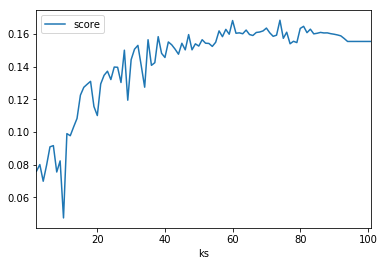

In [42]:
from sklearn.cluster import KMeans

#"""""""""""""""""""""""""""Brought fot Test only"""""""""""""
from sklearn.metrics import silhouette_score
k_list=[]
s_list=[]
for i in range(2,102):
    model=KMeans(init="k-means++", n_clusters=i, n_init=10).fit(X)
    s=silhouette_score(X, model.labels_)
    k_list.append(i)
    s_list.append(s)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
kdf=pd.DataFrame({
                "ks":k_list,
                "score": s_list
             })
kdf=kdf.set_index("ks")
kdf.plot(kind="line")
kdf.sort_values(by=["score"], ascending=False)[:10]

In [28]:
X=df_X[df_X.columns[3:]]
X

,Accessories Store,Acupuncturist,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,...,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.000000
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


## Tip: Press run all cell from below to get result in one shot

In [29]:
no_of_cluster=0

In [30]:
no_of_cluster=int(input("How Many CLusters you want ot make: "))

How Many CLusters you want ot make: 5


In [31]:
print("No of clusters:", no_of_cluster)
model=KMeans(n_clusters=no_of_cluster, random_state=0)
model.fit(X)
model.labels_

No of clusters: 5


array([0, 2, 2, 2, 2, 3, 3, 2, 0, 3, 2, 2, 3, 3, 2, 1, 3, 0, 0, 2, 2, 1,
       1, 2, 3, 2, 3, 0, 1, 1, 2, 2, 0, 3, 1, 3, 4, 4, 4, 4, 3, 2, 2, 0,
       0, 0, 0, 3, 3, 2, 2, 2, 3, 3, 3, 0, 4, 3, 3, 3, 3, 3, 2, 2, 1, 3,
       3, 2, 3, 2, 1, 1, 3, 2, 2, 0, 3, 1, 3, 0, 1, 3, 0, 4, 3, 0, 4, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 2, 1, 3, 0], dtype=int32)

In [32]:
df_y=df_X[df_X.columns[:3]]
df_y["Cluster"]=list(model.labels_)
df_y

/home/boo/anaconda3/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighbourhood,Latitude,Longitude,Cluster
0,"Adelaide, King, Richmond",43.650486,-79.379498,0
1,Agincourt,43.785353,-79.278549,2
2,"Agincourt North, L'Amoreaux East, Milliken, St...",43.808038,-79.266439,2
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.741665,-79.584543,2
4,"Alderwood, Long Branch",43.601717,-79.545233,2
...,...,...,...,...
98,Willowdale West,43.775356,-79.416686,1
99,Woburn,43.759824,-79.225291,2
100,"Woodbine Gardens, Parkview Hill",43.712078,-79.302567,1
101,Woodbine Heights,43.699930,-79.319132,3


# Mapping clusters of similar Neighbourhood 

#### Seting up Folium

In [33]:
import folium
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="coursera_capstone_05", timeout=15)

#### Making Main Map

In [34]:
location=geolocator.geocode("Toronto")
latitude=location.latitude
longitude=location.longitude
print("Toronto has Latitude:",latitude,"Longitude", longitude)
print("Generating Map:")
tor_map=folium.Map(location=[latitude, longitude], zoom_start=10)
tor_map

Toronto has Latitude: 43.653963 Longitude -79.387207
Generating Map:


#### Making Pallets for cluster

In [35]:
import seaborn as sns

ks=list(set(model.labels_))
palettes=sns.color_palette(None,len(ks)).as_hex()
kluster_colour_dict=dict(zip(ks, palettes))

#### Ploting clusters on map

In [36]:
for i in df_y.index:
    
    neighbourhood=df_y.iloc[i]["Neighbourhood"]
    borough=tt_df.loc[tt_df["Neighbourhood"]==neighbourhood,"Borough"].iloc[0]
    
    k=df_y.iloc[i]["Cluster"]
    
    label=neighbourhood+","+borough
    label=folium.Popup(label, parse_html=True)
    
        
    lat=df_y.iloc[i]["Latitude"]
    long=df_y.iloc[i]["Longitude"]
    
    
    color=kluster_colour_dict[k]
    
    folium.CircleMarker(
                        [lat, long],
                        radius=5,
                        popup=label,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.7,
                        parse_html=False
                        ).add_to(tor_map)
tor_map

# Final Analysis 

### Type cluster to analyse

In [37]:
cluster_no=int(input("Which cluster you want details of: " ))
df_y[df_y["Cluster"]==cluster_no]

Which cluster you want details of: 2


,Neighbourhood,Latitude,Longitude,Cluster
1,Agincourt,43.785353,-79.278549,2
2,"Agincourt North, L'Amoreaux East, Milliken, St...",43.808038,-79.266439,2
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.741665,-79.584543,2
4,"Alderwood, Long Branch",43.601717,-79.545233,2
7,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,2
10,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.635317,-79.563674,2
11,"Brockton, Exhibition Place, Parkdale Village",43.650917,-79.440022,2
14,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.642564,-79.387087,2
19,Central Bay Street,43.656962,-79.384224,2
20,"Chinatown, Grange Park, Kensington Market",43.652924,-79.398032,2


####  Saving DF

In [38]:
df_y.to_csv("toronto_y.csv", index=False)

#### ----------------------------------------------Checkpoint-----------------------------